# Шаблон для проекта по A/B - тестам.

### `chat_id ` из Телеграма:

In [ ]:
chat_id = 588908837

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

**Контекст**\
Мы считаем, что наш продукт достаточно дорогой для клиента.
У нас есть гипотеза, что уменьшение цены продукта
позволит повысить частоту продаж
и суммарно увеличит доходность продукта.
        
**Тест**\
Мы проводим тест,
в рамках которого контролем является
продажа продукта со старой ценой,
а тестом - продажа продукта с новой ценой.
Целью этого теста
является проверка гипотезы роста доходности
нашего продукта из-за уменьшения тарифа.

**Статистические вводные**\
Уровень значимости 5%.
Мы хотели бы различать 5%-ное
изменение целевой метрики
с вероятностью 80%.

### 1. Необходимо выбрать метрику и привести аргументацию.

Необходимо выбрать метрику, отражающую доходность продукта. Выбираю метрику net profit (NPV). Это метрика, которая учитывает все расходы и доходы от продажи продукта. В данной задаче, уменьшение цены продукта может повлиять на объем продаж, что приведет к увеличению выручки, однако необходимо учесть уменьшение дохода, связанного с снижением цены продукта, а также другие расходы, связанные с производством и продажей продукта. Поэтому, использование метрики net profit поможет оценить реальный эффект уменьшения цены продукта на общую прибыль компании и понять, является ли это изменение цены продукта эффективным.

### 2. Альтернатива в критерии.

Альтернативой в критерии является изменение NPV в тестовой группе по сравнению с контрольной группой. То есть, если NPV в тестовой группе статистически значимо выше, чем в контрольной группе, то это говорит о том, что изменение цены продукта положительно влияет на доходность продукта.

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

$
N = \frac{\sigma^2 (z_{1 - \alpha} - z_{\beta})^2}{k \Delta^2}
$

$k = \frac{1}{2} \text{ -- хотим иметь баланс между тестом и контролем, так как собираемся считать среднее по NPV, что не объективно делать по вборкам разного раззмера} \\
\alpha = 0.05 \text{ -- уровень значимости} \\
\beta = 1 - 0.8 = 0.2 \text{ -- ошибка второго рода критерия} \\
z_{1 - \alpha} \text{, } z_{\beta} \text{ -- квантили стандартного нормального распределления} \\
\Delta = \text{MDE } = p \cdot NPV_{hist} \text{, } p = 0.05 \text{ -- изменение целевой метрики, } NPV_{hist} \text{ -- значение целевой метрики на исторических данных} \\
\sigma^2 \text{ -- несмещённая выборочная дисперсия по целевой метрике(NPV)}  
$

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
data_hist = pd.read_csv("hist_telesales.csv", encoding = "utf-8", index_col=0)

In [5]:
data_hist

,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
ID,,,,,
0,1,0,90,0,-90
1,0,0,5,0,-5
2,0,0,68,0,-68
3,1,0,22,0,-22
4,1,0,22,0,-22
...,...,...,...,...,...
72156,1,1,577,1346,769
72157,0,0,8,0,-8
72158,0,0,23,0,-23


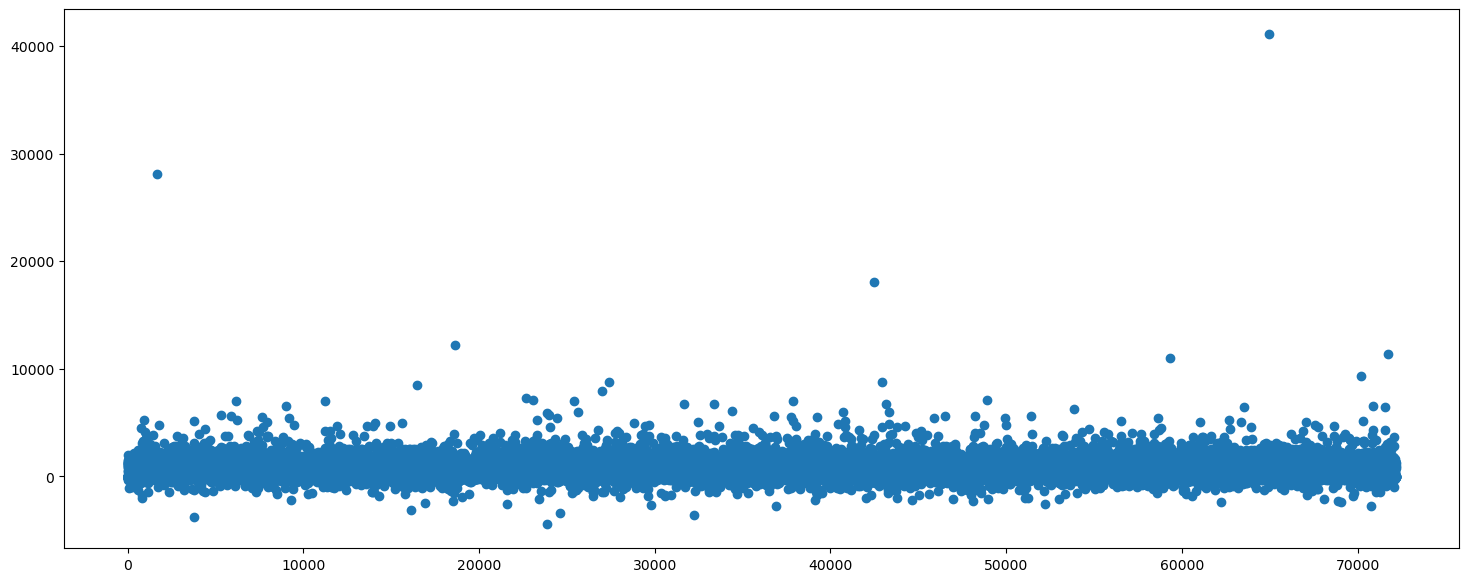

In [11]:
fig = plt.figure(figsize=(18, 7))
plt.scatter(data_hist.index, data_hist["NPV"])

In [13]:
npv_data = [x for x in data_hist["NPV"]]

In [14]:
k = 1/2

alpha = 0.05
beta = 0.2
z_a = st.norm.ppf(1 - alpha)
z_b = st.norm.ppf(beta)
print("z_(1-alpha) =", z_a)
print("z_(beta) =", z_b)
print("z_(1-alpha) - z_(beta) =", z_a - z_b)

p = 0.05
npv_hist = np.mean(npv_data)
delta = p * npv_hist
print("delta =", delta)

sigma_2 = 0
for npv in npv_data:
    sigma_2 += (npv - npv_hist)**2
sigma_2 /= (len(npv_data) - 1)
print("sigma^2 =", sigma_2)

N = (sigma_2 * (z_a - z_b)**2) / (k * delta**2)
print("N =", N)

z_(1-alpha) = 1.6448536269514722
z_(beta) = -0.8416212335729142
z_(1-alpha) - z_(beta) = 2.4864748605243863
delta = 14.07299025789554
sigma^2 = 459229.7274066438
N = 28671.826535304303


Получаем следующие значения:
$
\\
z_{1 - \alpha} - z_{\beta} = 2.5 \\
\sigma^2 = 459229.7 \\
\Delta = 14.07 \\
k = \frac{1}{2}$

Итого, получили размер выборки:

$
N = 28672
$

### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
code = 33515

### 4. Принятие решения. Расписать подробно с аргументами.

Теперь необходимо сравнить значение метрики на контрольной и тестовой выборках. Так кака мы считаем среднее NPV, то для проверки гипотезы о том, что они равны, против альтернативы, что среднее NPV на тесте больше чем на контроле(доходность повысилась после снижения тарифа), воспользуемся тестом Стьюдента с альтернативой less(кторый как раз проверяет равентсов средних), что соответствует правосторонней альтернативе.

In [19]:
control_1 = pd.read_csv("task1/Контроль.csv")
test_1 = pd.read_csv("task1/Тест.csv")

npv_control = control_1["NPV"].mean()
npv_test = test_1["NPV"].mean()
print("Mean NPV for control:", npv_control)
print("Mean NPV for test:", npv_test)
print(st.ttest_ind(control_1["NPV"], test_1["NPV"], alternative="less"))

Mean NPV for control: 276.9931640625
Mean NPV for test: 297.81651088169644
Ttest_indResult(statistic=-3.7002982902916077, pvalue=0.00010777369870733305)


Получили значение pvalue много меньше уровня значимости, из чего следует, что мы принимаем альтернативу: среднее NPV на тесте выше, чем на контроле, что в контексте нашей задачи означает, что **при снижении тарифа мы наблюдаем рост доходности, а значит и повысилась частота продаж**.

##  <ins>Задание 2.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

**Контекст**\
ЦБ смягчило правило,
ограничивающее варианты продажи услуги.
Мы хотим попробовать
более агрессивную продажу услуги,
но боимся,
что это повлияет на экономику основного продукта (КК)
из-за негатива клиентов.

**Тест**\
Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) 
мы будем предлагать услугу текущим способом,
а второй части (тесту) - новым более агрессивным способом.
Целью этого теста 
является увеличение доходности КК + услуги.

**Статистические вводные**\
Проверка однородности выбранного параметра
осуществяется с уровнем значимости 2%.

Уровень значимости 5%.
Мы хотели бы различать 3%-ное
изменение целевой метрики
с вероятностью 85%.

### 1. Необходимо выбрать метрику и привести аргументацию.

При условии, что целью теста является увеличение доходности КК + услуги, наиболее подходящей метрикой будет NPV. NPV позволяет оценить эффективность проекта и учитывает разницу между стоимостью вложений в проект и ожидаемыми доходами, приведенными к единому моменту времени. В данном случае, NPV учитывает как доходы от продаж КК, так и доходы от продажи услуги, и позволит оценить общую эффективность теста.

### 2. Альтернатива в критерии.

Альтернативой в критерии является изменение NPV в тестовой группе по сравнению с контрольной группой. То есть, альтернативная гипотеза: введение более агрессивной продажи услуги повлияет на экономику основного продукта (КК) из-за негатива клиентов.

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

In [20]:
data_credit_card = pd.read_csv("hist_credit_card.csv")

In [21]:
data_credit_card.head()

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
0,0,19,21620.835463,0.138061,0,102,0,0,-102
1,1,27,24897.990863,0.035508,1,409,11686,1754,13031
2,2,50,23989.526947,0.098793,0,16,0,0,-16
3,3,18,38442.409756,0.365661,1,788,13738,1578,14528
4,4,24,21291.521612,0.036909,1,1048,6594,2213,7759


Для проверки зависимости параметров посмотрим на матрицу корреляций и частных корреляций. Вторая в приоритете, чтобы исключить влияние остальных параметров.

<AxesSubplot:title={'center':'Partial correlations'}>

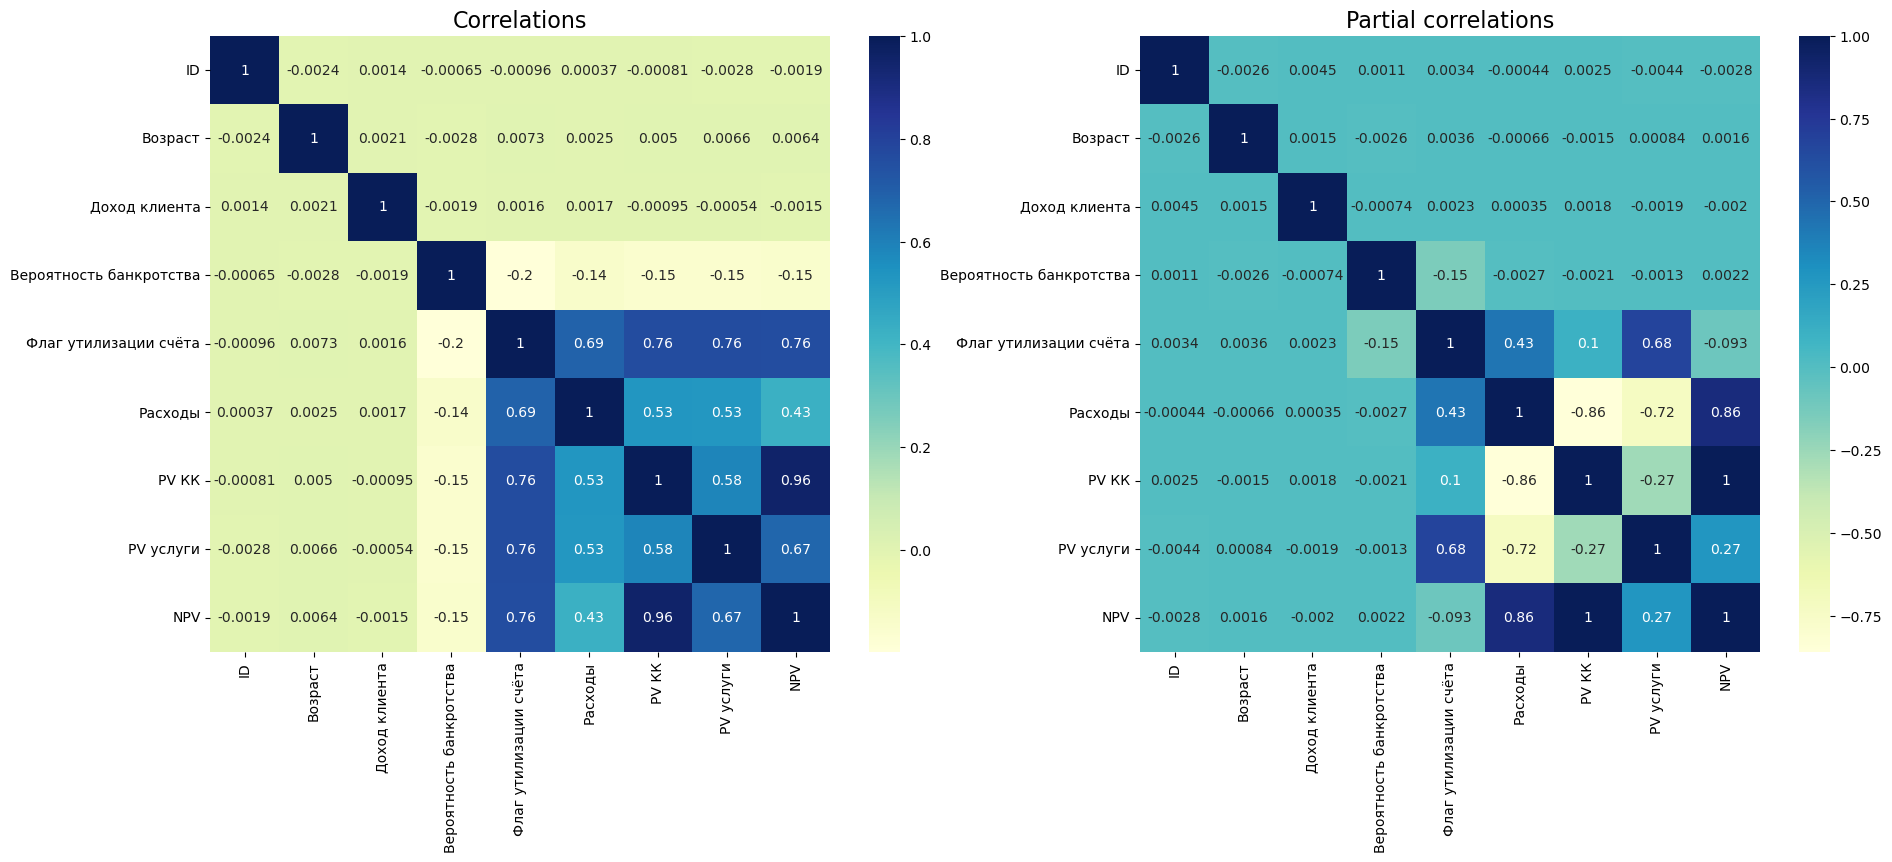

In [25]:
import pingouin as pg

corr = data_credit_card.corr(method="spearman")
pcorr = pg.pcorr(data_credit_card)

fig, ax = plt.subplots(1, 2, figsize=(22, 8))
ax[0].set_title("Correlations", fontsize=16)
sb.heatmap(corr, annot=True, ax=ax[0], cmap="YlGnBu")
ax[1].set_title("Partial correlations", fontsize=16)
sb.heatmap(pcorr, annot=True, ax=ax[1], cmap="YlGnBu")

Смотрим на колонку NPV, как целевой метрики. Смотрим на параметры до прохода человека по процессу заявки. Больше всего влияет **Вероятность банкротства**

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

$
N = \frac{\sigma^2 (z_{1 - \alpha} - z_{\beta})^2}{k \Delta^2}
$

$k = \frac{1}{2} \text{ -- хотим иметь баланс между тестом и контролем, так как собираемся считать среднее по NPV, что не объективно делать по вборкам разного раззмера} \\
\alpha = 0.05 \text{ -- уровень значимости} \\
\beta = 1 - 0.85 = 0.15 \text{ -- ошибка второго рода критерия} \\
z_{1 - \alpha} \text{, } z_{\beta} \text{ -- квантили стандартного нормального распределления} \\
\Delta = \text{MDE } = p \cdot NPV_{hist} \text{, } p = 0.03 \text{ -- изменение целевой метрики, } NPV_{hist} \text{ -- значение целевой метрики на исторических данных} \\
\sigma^2 \text{ -- несмещённая выборочная дисперсия по целевой метрике(NPV)}  
$

In [26]:
npv_data = [x for x in data_credit_card["NPV"]]

In [27]:
k = 1/2

alpha = 0.05
beta = 0.15
z_a = st.norm.ppf(1 - alpha)
z_b = st.norm.ppf(beta)
print("z_(1-alpha) =", z_a)
print("z_(beta) =", z_b)
print("z_(1-alpha) - z_(beta) =", z_a - z_b)

p = 0.03
npv_hist = np.mean(npv_data)
delta = p * npv_hist
print("delta =", delta)

sigma_2 = 0
for npv in npv_data:
    sigma_2 += (npv - npv_hist)**2
sigma_2 /= (len(npv_data) - 1)
print("sigma^2 =", sigma_2)

N = (sigma_2 * (z_a - z_b)**2) / (k * delta**2)
print("N =", N)

z_(1-alpha) = 1.6448536269514722
z_(beta) = -1.0364333894937898
z_(1-alpha) - z_(beta) = 2.6812870164452622
delta = 256.8063565778265
sigma^2 = 473437865.83330643
N = 103220.99887836768


Получаем следующие значения:
$
\\
z_{1 - \alpha} - z_{\beta} = 2.68 \\
\sigma^2 = 473437865.83 \\
\Delta = 256.8 \\
k = \frac{1}{2}$

Итого, получили размер выборки:

$
N = 103221
$

### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
code = 39140

### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

Воспользуемся критерием Андерсона-Дарлинга для проверки однородности.\
Проверяем по параметру **Вероятность банкротства**, определённому выше.

In [31]:
control_2 = pd.read_csv("task2/Контроль.csv")
test_2 = pd.read_csv("task2/Тест.csv")

anderson = st.anderson_ksamp([control_2["Вероятность банкротства"], test_2["Вероятность банкротства"]])
print(anderson)

Anderson_ksampResult(statistic=0.4045916871841946, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.22702129852013045)


Получили pvalue больше > 0.25, что выше уровня значимости (из условия = 0.02), что означает, что выборки **однородны**. Значит можно проводить тест на проверку основной гипотезы.

Аналогично Задаче 1 используем тест Стьдента для проверки равенства средних NPV с правосторонней альтернативой(less).

In [30]:
npv_control = control_2["NPV"].mean()
npv_test = test_2["NPV"].mean()
print("Mean NPV for control:", npv_control)
print("Mean NPV for test:", npv_test)
print(st.ttest_ind(control_2["NPV"], test_2["NPV"], alternative="less"))

Mean NPV for control: 8459.216128500982
Mean NPV for test: 8523.002799817867
Ttest_indResult(statistic=-1.2663628674007272, pvalue=0.1026923137851139)


Получили значение pvalue много меньше уровня значимости, из чего следует, что мы принимаем альтернативу: среднее NPV на тесте выше, чем на контроле, что в контексте нашей задачи означает, что **при более агрессивной продаже услуг общая доходность КК + услуги растёт**.